### Imports and config

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", 100)


### Load data

In [7]:
data_path = "../data/MachineLearningRating_v3.txt" 
df = pd.read_csv(data_path, delimiter='|')

print(df.shape)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_39400\1614863841.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, delimiter='|')


(1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Data structure and quality

In [8]:
# Info and dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [9]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000098.0,1.048175e+05,6.329371e+04,1.000000e+00,5.514300e+04,9.408300e+04,1.391900e+05,3.011750e+05
PolicyID,1000098.0,7.956682e+03,5.290039e+03,1.400000e+01,4.500000e+03,7.071000e+03,1.107700e+04,2.324600e+04
PostalCode,1000098.0,3.020601e+03,2.649854e+03,1.000000e+00,8.270000e+02,2.000000e+03,4.180000e+03,9.870000e+03
mmcode,999546.0,5.487770e+07,1.360381e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000098.0,2.010225e+03,3.261391e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,999546.0,4.046642e+00,2.940201e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,999546.0,2.466743e+03,4.428006e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,999546.0,9.720792e+01,1.939326e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,999546.0,4.019250e+00,4.683144e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,220456.0,2.255311e+05,5.645157e+05,2.000000e+04,1.350000e+05,2.200000e+05,2.800000e+05,2.655000e+07


In [10]:
# Value counts for a few key categoricals
for col in ["Province", "VehicleType", "Gender"]:
    if col in df.columns:
        display(df[col].value_counts().head(10))


Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64

VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64

Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64

In [11]:
# Missing values
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0].head(20)

NumberOfVehiclesInFleet    1.000000
CrossBorder                0.999302
CustomValueEstimate        0.779566
Rebuilt                    0.641838
Converted                  0.641838
WrittenOff                 0.641838
NewVehicle                 0.153280
Bank                       0.145947
AccountType                0.040228
Gender                     0.009535
MaritalStatus              0.008258
VehicleType                0.000552
make                       0.000552
mmcode                     0.000552
Model                      0.000552
Cylinders                  0.000552
bodytype                   0.000552
kilowatts                  0.000552
NumberOfDoors              0.000552
VehicleIntroDate           0.000552
dtype: float64

In [12]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

In [13]:
for col in ["TotalPremium", "TotalClaims", "CustomValueEstimate"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


### Create key derived metrics

In [14]:
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]
df["Margin"] = df["TotalPremium"] - df["TotalClaims"]

### Univariate distributions

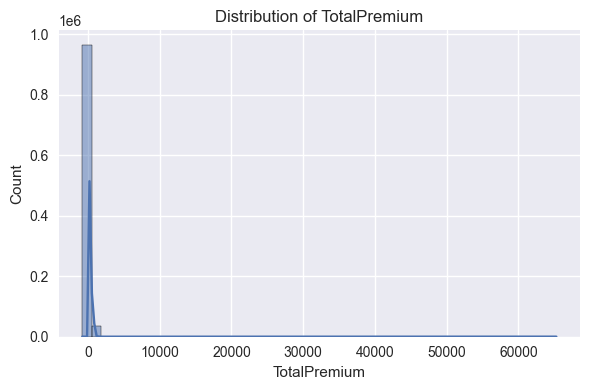

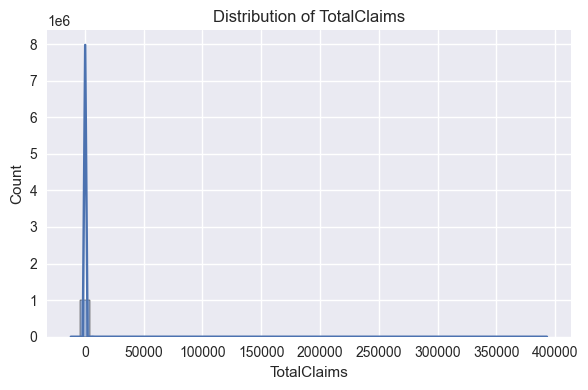

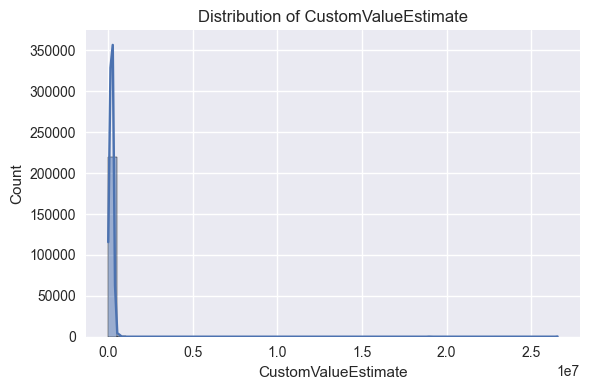

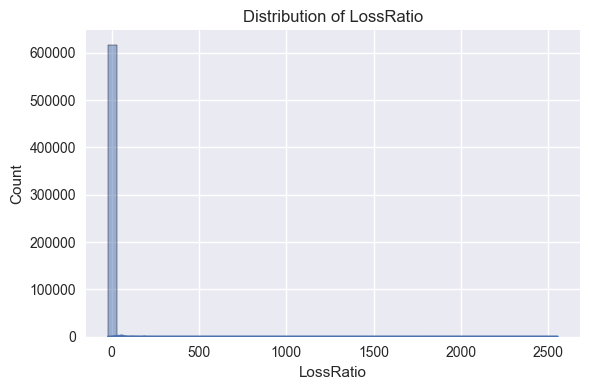

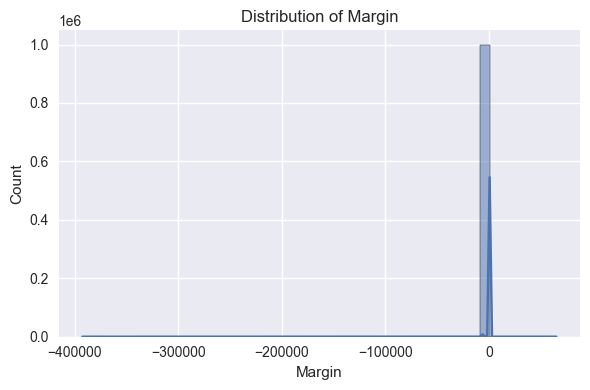

In [16]:
numeric_cols = ["TotalPremium", "TotalClaims", "CustomValueEstimate", "LossRatio", "Margin"]
numeric_cols = [c for c in numeric_cols if c in df.columns]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


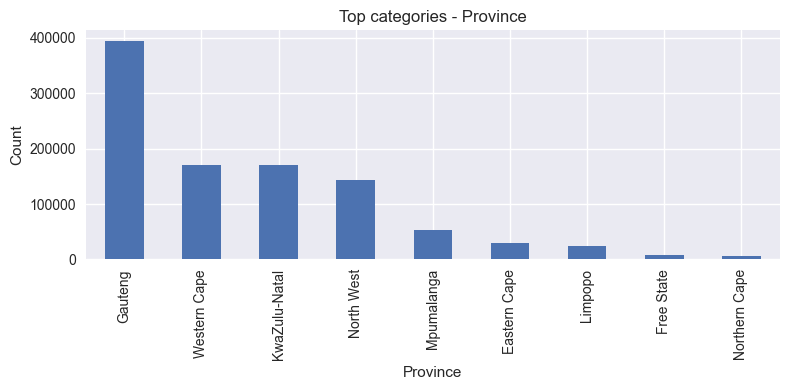

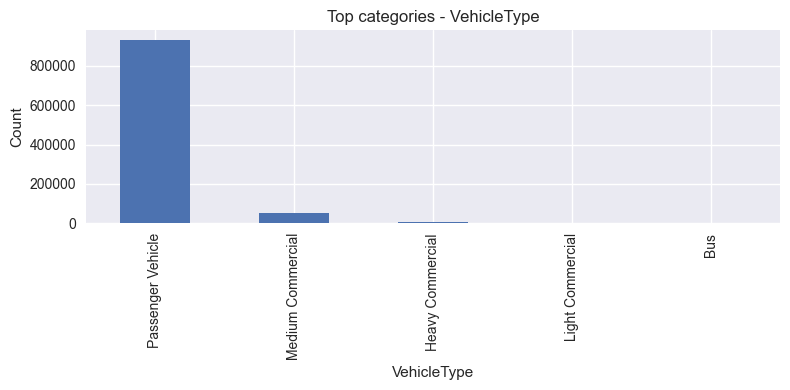

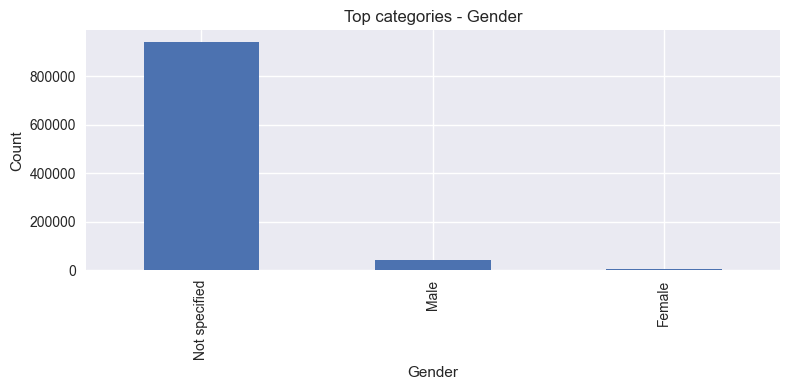

In [17]:
# For categorical variables:

cat_cols = ["Province", "VehicleType", "Gender", "Make"]
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        df[col].value_counts().head(15).plot(kind="bar")
        plt.title(f"Top categories - {col}")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()


### Bivariate and multivariate analysis

In [18]:
def summarize_loss_ratio(group_cols):
    agg = (
        df.groupby(group_cols)
        .agg(
            policies=("PolicyID", "nunique"),
            total_premium=("TotalPremium", "sum"),
            total_claims=("TotalClaims", "sum"),
        )
        .reset_index()
    )
    agg["loss_ratio"] = agg["total_claims"] / agg["total_premium"]
    return agg

by_province = summarize_loss_ratio(["Province"])
by_vehicle = summarize_loss_ratio(["VehicleType"])
by_gender = summarize_loss_ratio(["Gender"])

by_province.sort_values("loss_ratio", ascending=False).head()


,Province,policies,total_premium,total_claims,loss_ratio
2,Gauteng,2578,2.405377e+07,2.939415e+07,1.222018
3,KwaZulu-Natal,1370,1.320908e+07,1.430138e+07,1.082693
8,Western Cape,947,9.806559e+06,1.038977e+07,1.059472
6,North West,1117,7.490508e+06,5.920250e+06,0.790367
5,Mpumalanga,382,2.836292e+06,2.044675e+06,0.720897


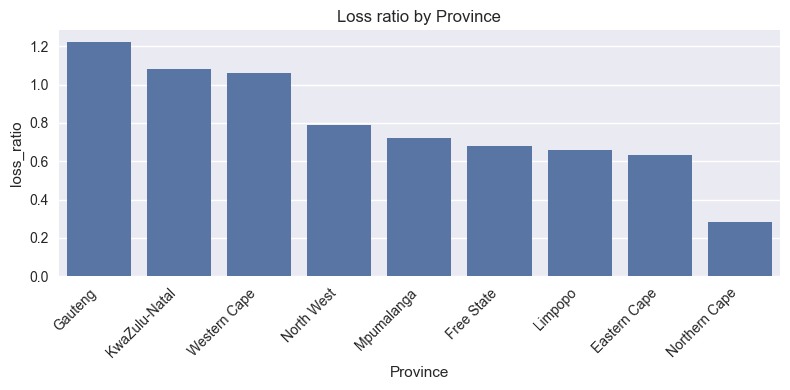

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(data=by_province.sort_values("loss_ratio", ascending=False),
            x="Province", y="loss_ratio")
plt.xticks(rotation=45, ha="right")
plt.title("Loss ratio by Province")
plt.tight_layout()
plt.show()


#### Temporal trends

C:\Users\HP\AppData\Local\Temp\ipykernel_39400\3751633993.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="TransactionMonth", freq="M"))


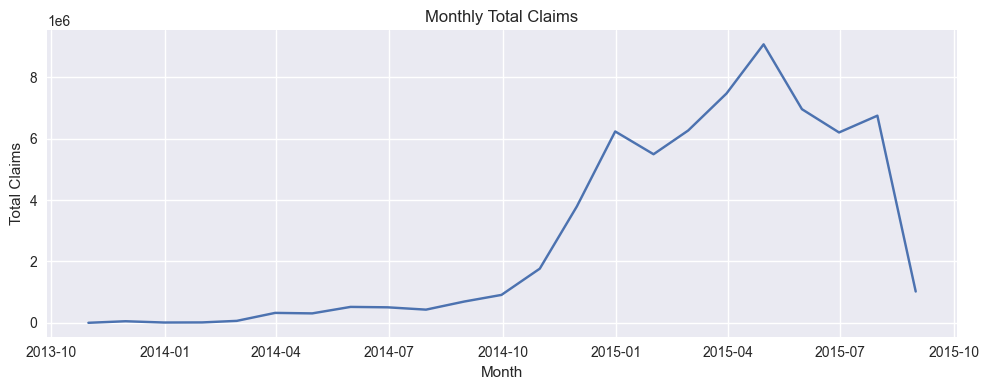

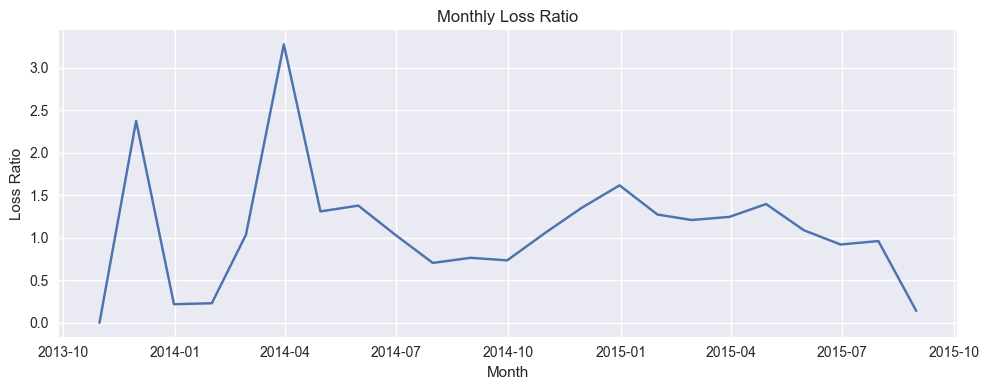

In [20]:
monthly = (
    df.groupby(pd.Grouper(key="TransactionMonth", freq="M"))
    .agg(
        total_premium=("TotalPremium", "sum"),
        total_claims=("TotalClaims", "sum"),
        policies=("PolicyID", "nunique"),
    )
    .reset_index()
)
monthly["loss_ratio"] = monthly["total_claims"] / monthly["total_premium"]

plt.figure(figsize=(10, 4))
plt.plot(monthly["TransactionMonth"], monthly["total_claims"])
plt.title("Monthly Total Claims")
plt.xlabel("Month")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(monthly["TransactionMonth"], monthly["loss_ratio"])
plt.title("Monthly Loss Ratio")
plt.xlabel("Month")
plt.ylabel("Loss Ratio")
plt.tight_layout()
plt.show()


In [22]:
# For the requirement about monthly changes as a function of zip code:
monthly_zip = (
    df.groupby(["PostalCode", pd.Grouper(key="TransactionMonth", freq="M")])
    .agg(
        total_premium=("TotalPremium", "sum"),
        total_claims=("TotalClaims", "sum"),
    )
    .reset_index()
)

monthly_zip = monthly_zip.sort_values(["PostalCode", "TransactionMonth"])
monthly_zip["premium_change"] = (
    monthly_zip.groupby("PostalCode")["total_premium"].pct_change()
)
monthly_zip["claims_change"] = (
    monthly_zip.groupby("PostalCode")["total_claims"].pct_change()
)

monthly_zip.head()


,PostalCode,TransactionMonth,total_premium,total_claims,premium_change,claims_change
0,1,2013-11-30,1432.740561,50585.078947,NaN,NaN
1,1,2013-12-31,1494.352315,0.000000,0.043003,-1.0
2,1,2014-01-31,1178.007368,0.000000,-0.211694,NaN
3,1,2014-02-28,1178.007368,0.000000,0.000000,NaN
4,1,2014-03-31,1140.007131,0.000000,-0.032258,NaN


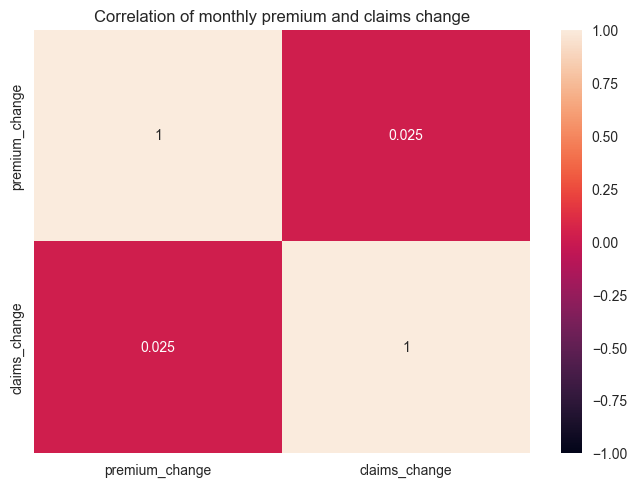

In [23]:
corr = monthly_zip[["premium_change", "claims_change"]].corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.title("Correlation of monthly premium and claims change")
plt.show()


#### Vehicle makes and models with highest or lowest claims

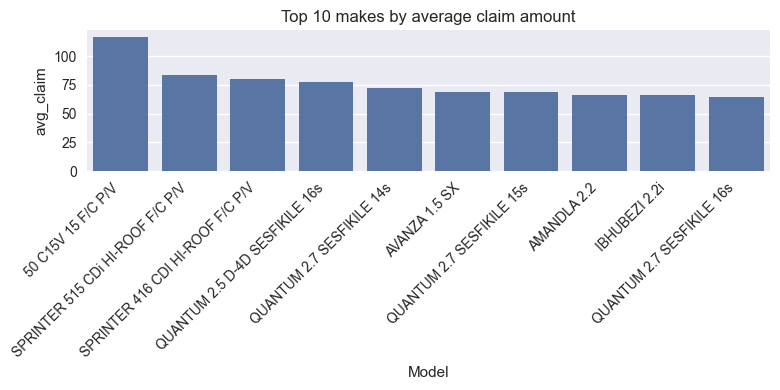

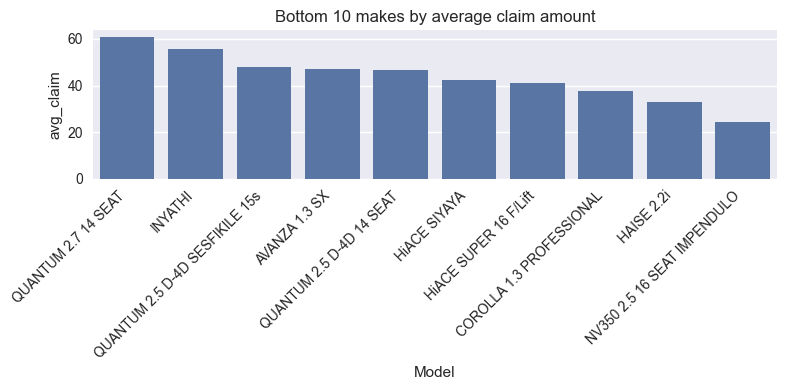

In [26]:
by_make = (
    df.groupby("Model")
    .agg(
        avg_claim=("TotalClaims", "mean"),
        total_claim=("TotalClaims", "sum"),
        count=("PolicyID", "nunique"),
    )
    .query("count >= 50")  # avoid very rare makes
    .sort_values("avg_claim", ascending=False)
)

top10 = by_make.head(10).reset_index()
bottom10 = by_make.tail(10).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=top10, x="Model", y="avg_claim")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 makes by average claim amount")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=bottom10, x="Model", y="avg_claim")
plt.xticks(rotation=45, ha="right")
plt.title("Bottom 10 makes by average claim amount")
plt.tight_layout()
plt.show()


### Outlier detection

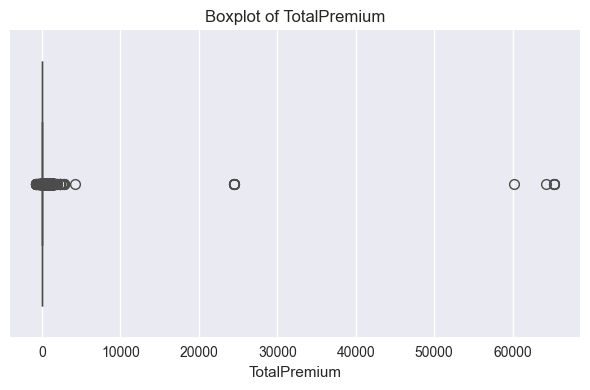

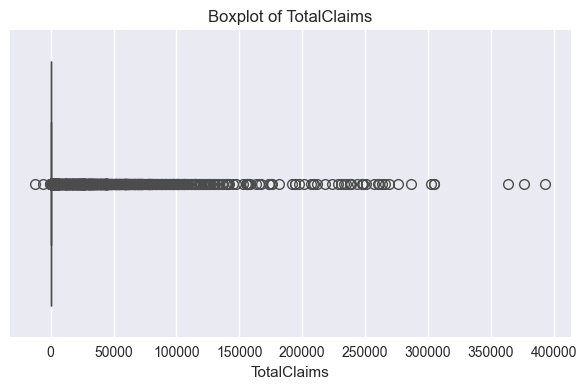

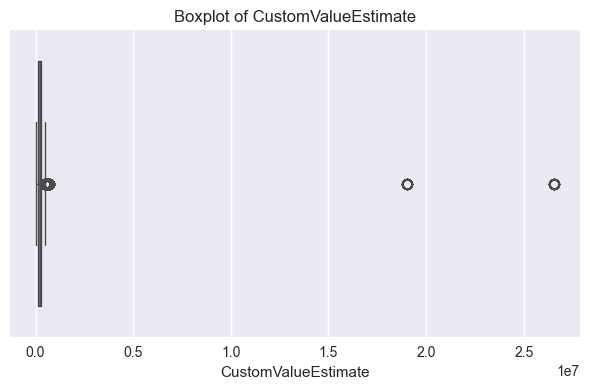

In [27]:
for col in ["TotalPremium", "TotalClaims", "CustomValueEstimate"]:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()


- All three variables are strongly right-skewed: long upper whiskers and many high-value outliers. Medians are near the lower end and IQRs are small relative to extremes.
- A large number of extreme high outliers — suggests heavy-tailed distributions or aggregation errors.